```{contents}
:depth: 4
```

# Graficas y animaciones

## Gráficas en 2D (Plots)


Usa el paquete `Plots` para graficar

Run `import Pkg; Pkg.add("PyPlot")` to install the PyPlot package.

In [1]:
# import Pkg; Pkg.add("PyPlot")

In [2]:
using Plots

Luego de cargarlo puedes usar una de los siguientes interfaces para mostrar las figuras
 
- `gr()`  por defecto
- `plotlyjs()` usa javascript, pueden existir conflictos con la visualización
- `pyplot()` requiere matplotlib de python


In [3]:
pyplot()

Plots.PyPlotBackend()

Si no tienes instalados los paquetes ejecuta la siguiente celda para la instalación y vuele a ejecutar la celda anterior.

In [4]:
using Pkg
Pkg.add("PyPlot")
Pkg.add("PlotlyJS")
Pkg.add("PGFPlotsX")

### Gráfica de Funciones en una Variable


**Ejemplo**

Graficar una función gaussiana sobre el intervalo $[-6,6]$ 

junto con puntos de una cuadrática

In [5]:
#función anónima  para la gaussiana
f(x) = exp(-x^2/2)/√(2π)

f (generic function with 1 method)

In [6]:
# puntos de la cuadrática y=1/2-x²
x = LinRange(-5,5,201)
y = fill(1/2,201) - x.^2/50;

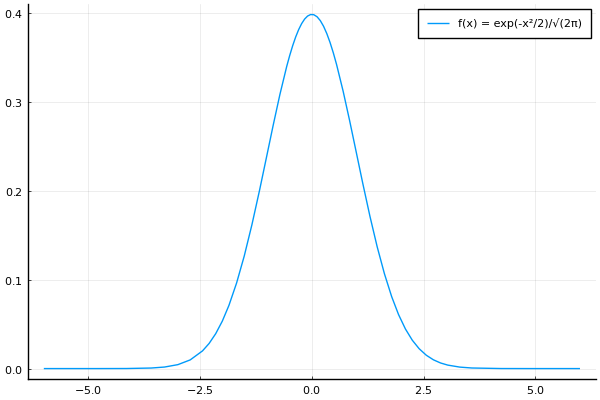

In [7]:
# gráfica de la gaussiana
plt = plot(f,-6,6,label = "f(x) = exp(-x²/2)/√(2π)")

Podemos superponer la gráfica anterior con otra usando `plot!`

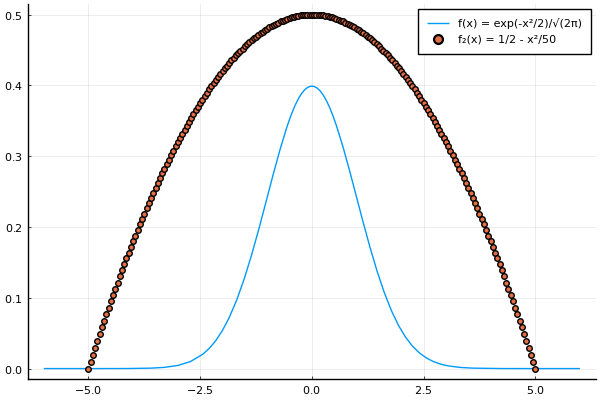

In [8]:
# gráfica los puntos de la cuadrática
scatter!(x,y,label = "f₂(x) = 1/2 - x²/50")

Guardamos la figura

In [9]:
savefig(plt,"mis gráficas.pdf")

### Visualización de Datos

**Podemos cargar los datos de un archivo de texto 
que describen a una curva y graficarla**

1. Cargamos paquetes

In [10]:
using PGFPlotsX    #Paquete de Graficación basado en Latex-Tikz
using LaTeXStrings #Para mostar código LaTex en pantalla
using DelimitedFiles #Para importar tu archivo de texto con los datos

2. Asignamos los datos a un arreglo

In [11]:
Data  = readdlm("datos.txt");
E     = Data[:,1]
dos   = Data[:,2]
p_dos = Data[:,3]
display(Data)

LoadError: ArgumentError: Cannot open 'datos.txt': not a file

3. Gráfico con atributos

In [12]:
plt = @pgf Axis(
    {
        title = "Densidad de Estados del Óxido de Aluminio",
        xlabel = "Energía (eV)",
        ylabel = "Densidad de Estados (Estados/eV)",
        height = "7.5cm",
        width = "15cm",
    },  
    
    LegendEntry(L"Densidad\ de\ Estados\ Al_2O_3"),
    
    Plot(
        {
             color = "blue",
        },
        Coordinates(E,p_dos)
    ),
        
)

LoadError: UndefVarError: E not defined

4. Guarda la Gráfica

In [13]:
pgfsave("gráfico.pdf", plt; include_preamble = true, dpi = 300)

LoadError: MethodError: no method matching save(::String, ::Plots.Plot{Plots.PyPlotBackend}; include_preamble=true, dpi=300)
[0mClosest candidates are:
[0m  save(::AbstractString, [91m::Plot[39m; kwargs...) at C:\Users\jeshu\.julia\packages\PGFPlotsX\xJiNw\src\axiselements.jl:613
[0m  save(::AbstractString, [91m::PGFPlotsX.AxisLike[39m; kwargs...) at C:\Users\jeshu\.julia\packages\PGFPlotsX\xJiNw\src\axislike.jl:44
[0m  save(::AbstractString, [91m::TikzPicture[39m; kwargs...) at C:\Users\jeshu\.julia\packages\PGFPlotsX\xJiNw\src\tikzpicture.jl:33
[0m  ...

## Gráficas en 3D (Plots)


### Funciones  de dos variables


Podemos graficar una función $f:\mathbb{R}^2\rightarrow \mathbb{R}$

**Ejemplo:** Graficar $$f(x,y)=e^{-\left(\frac{x^2}{2}+\frac{y^2}{2}\right)}$$

sobre el cuadrado $[-4,4]\times[-4,4]$

1. Cargamos Paquete de gráficación

In [14]:
# En esta libreta ya cargamos el módulo de gráficación con
# backend pyplot por lo que no es necesario volver a cargarlo 
using Plots
pyplot()

Plots.PyPlotBackend()

2. Formamos rejilla sobre el cuadrado

In [15]:
n = 50
rango = LinRange(-4,4,n)
X = repeat(rango',n,1)
Y = repeat(rango,1,n)

50×50 Matrix{Float64}:
 -4.0      -4.0      -4.0      -4.0      …  -4.0      -4.0      -4.0
 -3.83673  -3.83673  -3.83673  -3.83673     -3.83673  -3.83673  -3.83673
 -3.67347  -3.67347  -3.67347  -3.67347     -3.67347  -3.67347  -3.67347
 -3.5102   -3.5102   -3.5102   -3.5102      -3.5102   -3.5102   -3.5102
 -3.34694  -3.34694  -3.34694  -3.34694     -3.34694  -3.34694  -3.34694
 -3.18367  -3.18367  -3.18367  -3.18367  …  -3.18367  -3.18367  -3.18367
 -3.02041  -3.02041  -3.02041  -3.02041     -3.02041  -3.02041  -3.02041
 -2.85714  -2.85714  -2.85714  -2.85714     -2.85714  -2.85714  -2.85714
 -2.69388  -2.69388  -2.69388  -2.69388     -2.69388  -2.69388  -2.69388
 -2.53061  -2.53061  -2.53061  -2.53061     -2.53061  -2.53061  -2.53061
 -2.36735  -2.36735  -2.36735  -2.36735  …  -2.36735  -2.36735  -2.36735
 -2.20408  -2.20408  -2.20408  -2.20408     -2.20408  -2.20408  -2.20408
 -2.04082  -2.04082  -2.04082  -2.04082     -2.04082  -2.04082  -2.04082
  ⋮                              

3. Usamos `surface` para graficar la función

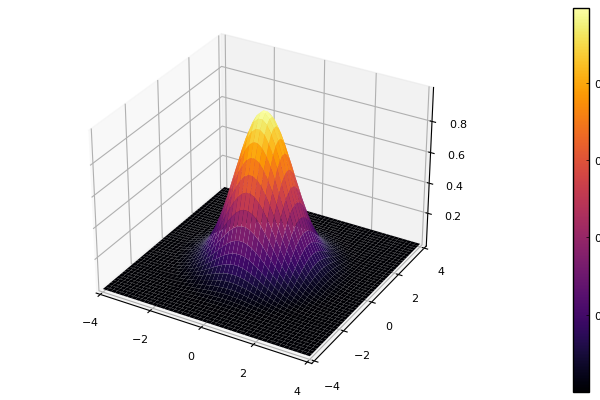

In [16]:
surface(X,Y, @. exp(-(X^2/2 + Y^2/2)))

### Animaciones 3D

Animación que muestra la deformación del helicoide al catenoide

Ambas superficies están dadas por la parametrización

$\begin{array}{ll}
 x(u,v) = & \cos(\theta)\sin(u)\sinh(v) + \sin(\theta)\cos(u)\cosh(v) \\
 y(u,v) = - & \cos(\theta)\cos(u)\sinh(v) + \sin(\theta)\sin(u)\cosh(v)\\
 z(u,v) = & u\cos(\theta) + v\sin(\theta)
\end{array}$

donde $u\in(-\pi,\pi]\ $ y $ \ v\in\mathbb R$

- $\theta=0 \qquad\longrightarrow\quad$ helicoide 
- $\theta=\pi/2 \ \quad\longrightarrow\quad$ catenoide 

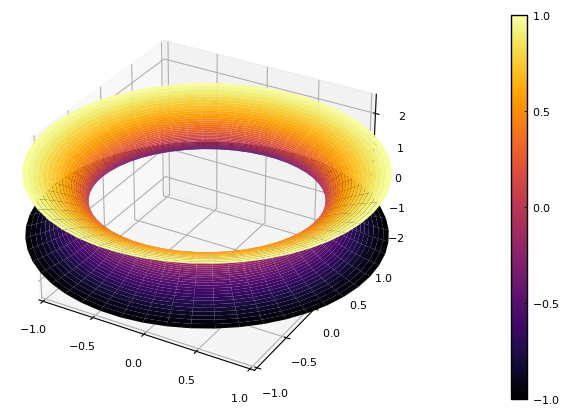

┌ Info: Saved animation to 
│   fn = C:\Users\jeshu\OptimizacionNumerica\docs\catenoid.gif
└ @ Plots C:\Users\jeshu\.julia\packages\Plots\YVapH\src\animation.jl:104


In [17]:
n = 51
animación2 = 
@animate for θ ∈ LinRange(0,π/2,11)
            u = LinRange(-π,π,n)
            v = LinRange(-1,1,n)
    
            x = cos(θ)*sin.(u)*sinh.(v)' +  sin(θ)*cos.(u)*cosh.(v)'
            y = -cos(θ)*cos.(u)*sinh.(v)' +  sin(θ)*sin.(u)*cosh.(v)'
            z = u*fill(cos(θ),1,n) +  fill(sin(θ),n)*v'
    
            surface(x,y,z, xlim=(-1,1), ylim=(-1.,1.), zlim=(-2.5,2.5))
end
gif(animación2, "catenoid.gif", fps = 1);

- Usamos el comando `surface` para graficar las superficies
- Usamos el macro `@animate` y el comando `gif` para generar la animación

Cambia esta celda al modo markdown y presiona Run para mostrar animación

<img src="catenoid.gif">  